# $Customer\ Analytics$

#### Case Study II
## <i>Customer Lifetime Value</i>
---

**Team 8:**  `Joseph Miguel, Jeremy Grace, Jonathan Hilgart, & Victor Vulovic`

<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from dateutil import relativedelta
import datetime
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr


Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['relativedelta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


* Load and prep <i>`purchase`</i> data

In [2]:
col_names = ['customer_id','amount','date']
original_df = pd.read_csv('purchases.txt',delimiter='\t',names=col_names)
original_df.date = pd.to_datetime(original_df['date']) ## datetime


* Create separate columns for **`month`** and **`year`**:

In [ ]:
original_df['month'] = pd.DatetimeIndex(original_df['date']).month ## add in month
original_df['year'] = pd.DatetimeIndex(original_df['date']).year ## add in year
original_df.date = pd.DatetimeIndex(original_df['date'])
##days
start_date = datetime.datetime(2016,1,1)
original_df['days_since_purchase'] = start_date -original_df.date  ## days since last purchase for each purchase


In [3]:
#http://stackoverflow.com/questions/4039879/best-way-to-find-the-months-between-two-dates
def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [4]:
#Months
original_df['months_since_purchase']=original_df.date.apply(lambda x: diff_month(start_date,x))
#Year
original_df['years_since_purchase']=original_df.date.apply(lambda x: diff_year(start_date,x))


* Get **quarters** (`three months` = 1 `quarter`)

In [5]:
original_df['quarters_since_purchase'] = (original_df.months_since_purchase/3).apply(lambda x: round(x))
# must use apply to avoid typerror for series to float failure for .round function

* Create **indicators** for our `state`

In [6]:
original_df['state_one'] = original_df.years_since_purchase.apply(lambda x: 3-x) >=0
original_df['state_two'] =  original_df.years_since_purchase.apply(lambda x: x>3 and x<=6)
original_df['state_three'] =  original_df.years_since_purchase.apply(lambda x: x>6 and x<=9)

In [7]:
## On average people make 2.78 purchases
print('Average purchases', np.mean(original_df.groupby(by=['customer_id']).count()['amount']))
# Median purcahses are 2.0
print('Median purchases', np.median(original_df.groupby(by=['customer_id']).count()['amount']))


Average purchases 2.7823749796383774
Median purchases 2.0


* `Number of days` between purchases on average per customer

In [8]:
first_last_per_customer =original_df.groupby('customer_id').date.max()  - \
original_df.groupby('customer_id').date.min()
first_last_per_customer= first_last_per_customer.reset_index()
number_of_purchases_per_cust = original_df.groupby('customer_id').amount.count()
number_of_purchases_per_cust = number_of_purchases_per_cust.reset_index()
first_last_per_customer['average']= first_last_per_customer.date / number_of_purchases_per_cust.amount
average_time_between_purchases_days = first_last_per_customer


In [9]:
average_time_between_purchases_days['average_days'] =\
        (first_last_per_customer.date / number_of_purchases_per_cust.amount).apply(lambda x:x.days)
#average_time_between_purchases_days= average_time_between_purchases_days.apply(lambda x:x.days)
average_time_between_purchases_days['average_months']= average_time_between_purchases_days.average_days.apply(lambda x:x/30)

* `Average number of months` since purchase per customer id

In [10]:
avg_months_since_purchase_per_customer= original_df.groupby(by=['customer_id',])['months_since_purchase'].mean().reset_index()

In [11]:
#(### average number of days between purcahses per customer id
## 0days means only one purchase

print('Average days in-between purchases',np.mean( \
average_time_between_purchases_days.average_days))

print('Median number of days in-between purchases',np.median( \
                        average_time_between_purchases_days.average_days))

Average days in-between purchases 171.68892870717272
Median number of days in-between purchases 51.0


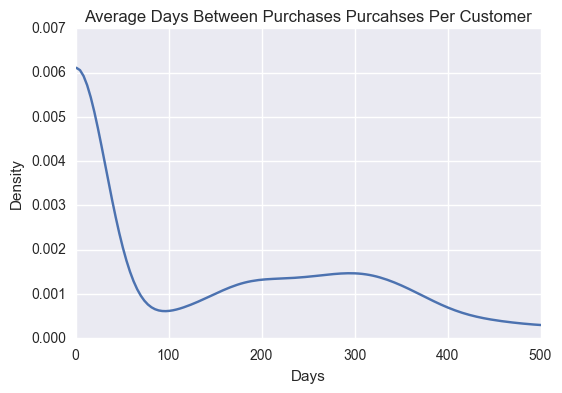

In [12]:
average_time_between_purchases_days.average_days.plot(kind='kde',xlim=[0,500])
plt.title('Average Days Between Purchases Purcahses Per Customer')
plt.xlabel('Days');

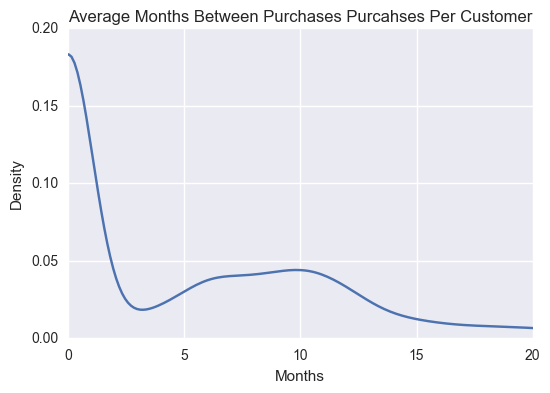

In [13]:
average_time_between_purchases_days.average_months.plot(kind='kde',xlim=[0,20])
plt.title('Average Months Between Purchases Purcahses Per Customer')
plt.xlabel('Months');

* `Number of purchases per month total` - **not** by unique customer id

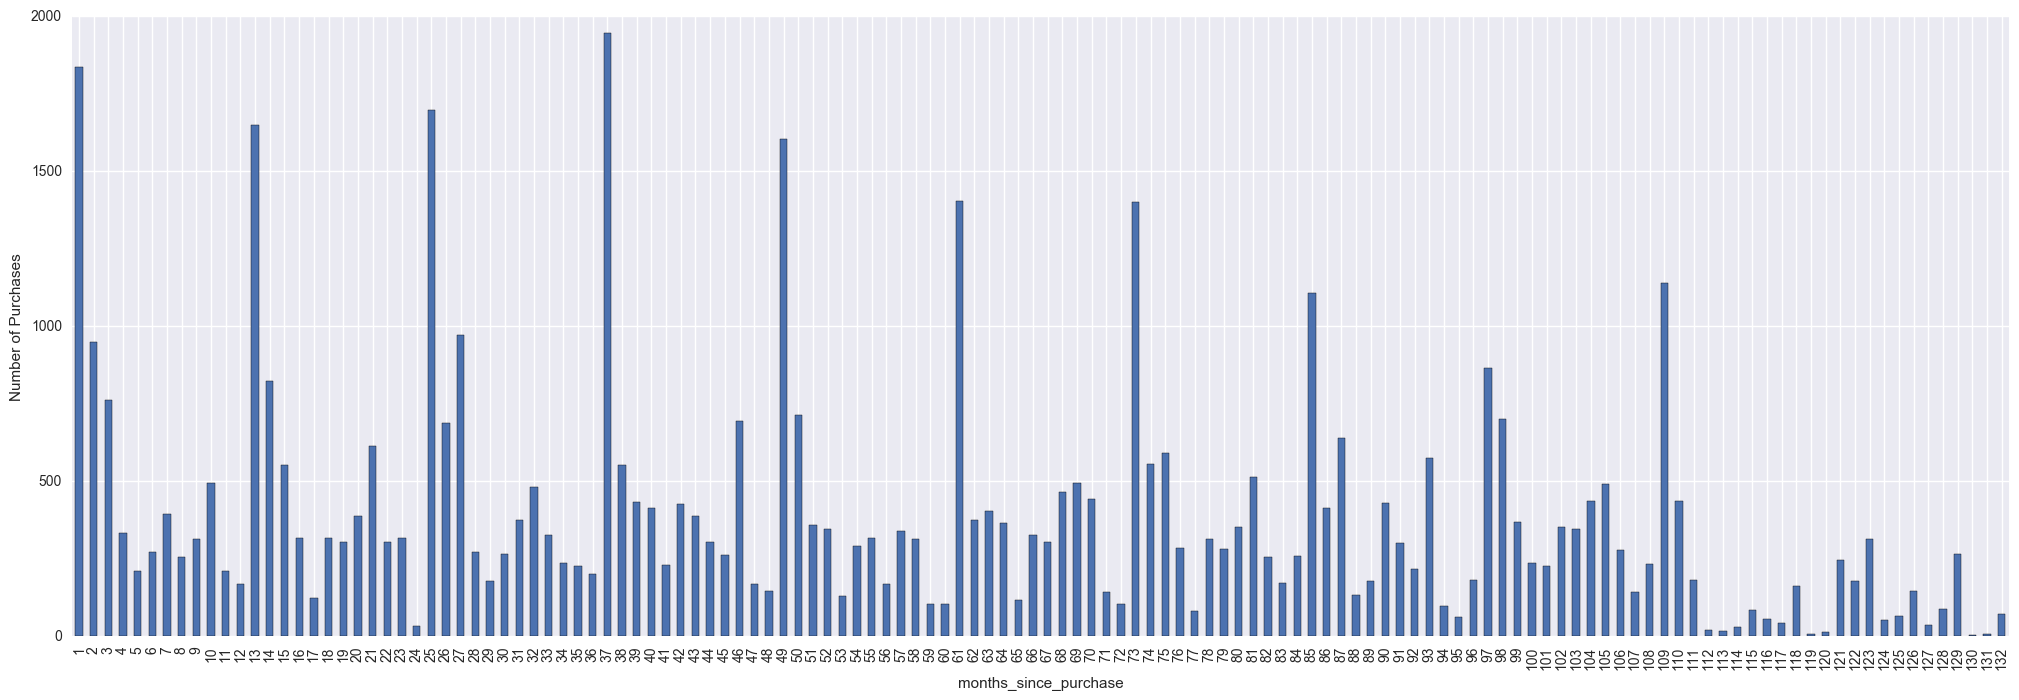

In [14]:
original_df.groupby(by=['months_since_purchase']).count()['customer_id'].plot(kind='bar',figsize=([25,8]))
plt.ylabel('Number of Purchases');

* `Number of pruchases per year total` - **not** by unique customer id

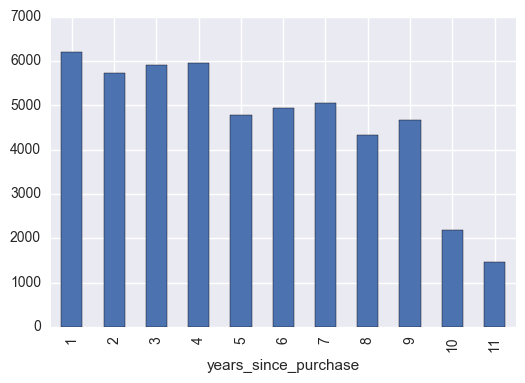

In [15]:
original_df.groupby(by=['years_since_purchase']).count()['customer_id'].plot(kind='bar');

In [16]:
cumulative_purchases_per_year = original_df.groupby(by=['years_since_purchase']).count()['customer_id'].apply(
lambda x: x/sum(original_df.groupby(by=['years_since_purchase']).count())).reset_index()

In [17]:
cumulative_purchases_per_year['running_total'] = cumulative_purchases_per_year.customer_id.cumsum()

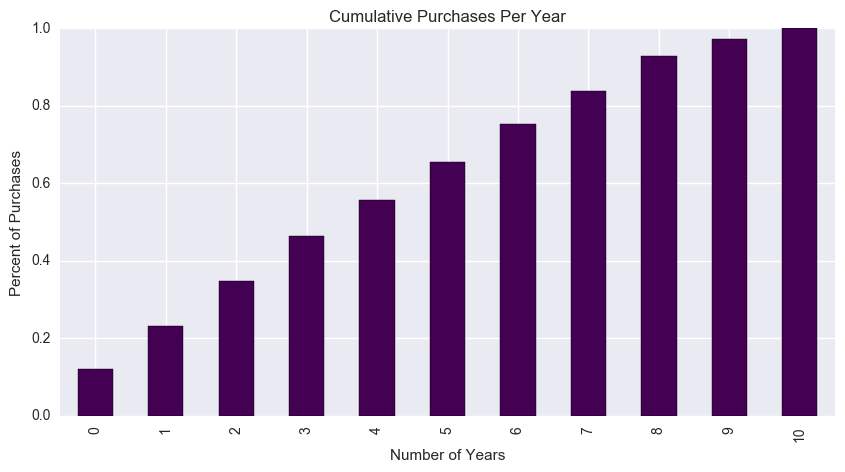

In [18]:
## Cumulative purchases over years
plt.figure(figsize=(10,5))
cumulative_purchases_per_year.running_total.plot(kind='bar',colormap='viridis')
plt.title('Cumulative Purchases Per Year')
plt.ylabel('Percent of Purchases')
plt.xlabel('Number of Years');

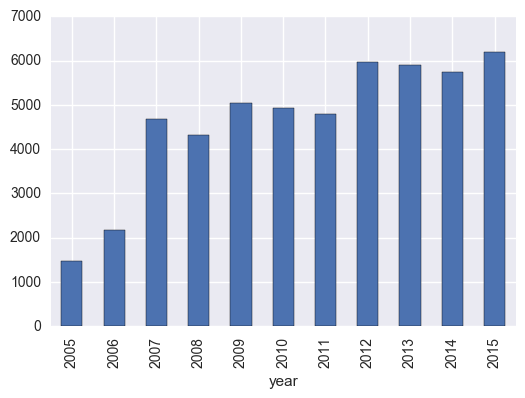

In [19]:
## Total number of purchases per year
original_df.groupby(['year']).count()['customer_id'].plot(kind='bar');

---
## Next, drop recrods in year 9 or 10 (only adds ~5% of total purchases)


In [20]:
## drop these 
original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,quarters_since_purchase,state_one,state_two,state_three
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11,41,False,False,False
6,2620,30.0,2006-03-09,3,2006,3585 days,118,10,39,False,False,False
8,3120,150.0,2006-11-08,11,2006,3341 days,110,10,37,False,False,False
12,4000,20.0,2005-11-25,11,2005,3689 days,122,11,41,False,False,False
16,4840,30.0,2005-10-14,10,2005,3731 days,123,11,41,False,False,False
17,4910,15.0,2006-12-13,12,2006,3306 days,109,10,36,False,False,False
19,4970,30.0,2006-12-01,12,2006,3318 days,109,10,36,False,False,False
20,5250,50.0,2005-12-20,12,2005,3664 days,121,11,40,False,False,False
22,5990,30.0,2006-03-17,3,2006,3577 days,118,10,39,False,False,False
23,6240,100.0,2006-11-09,11,2006,3340 days,110,10,37,False,False,False


In [21]:
indexes_to_drop = original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)].index

In [22]:
# this drops the last years (with very few purchases)
state_df = original_df.drop(original_df.index[indexes_to_drop])

In [23]:
## Confirm we dropped everything correctly
state_df[(state_df.state_one == False) &
            (state_df.state_two == False) &
                (state_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,quarters_since_purchase,state_one,state_two,state_three


---
# Next, break customers into segments using RFM metrics


## Find Amount 

In [24]:
amount_df = state_df.groupby('amount').count()['customer_id'].reset_index()

In [25]:
total_transactions = sum(state_df.groupby('amount').count()['customer_id'].reset_index()['customer_id'])

In [26]:
amount_df['relative_percent']=state_df.groupby('amount').count()['customer_id'].reset_index().customer_id/ total_transactions

In [27]:
amount_df['cumulative_percent']=amount_df.relative_percent.cumsum()

In [28]:
amount_df['total_purchases'] = amount_df['customer_id']

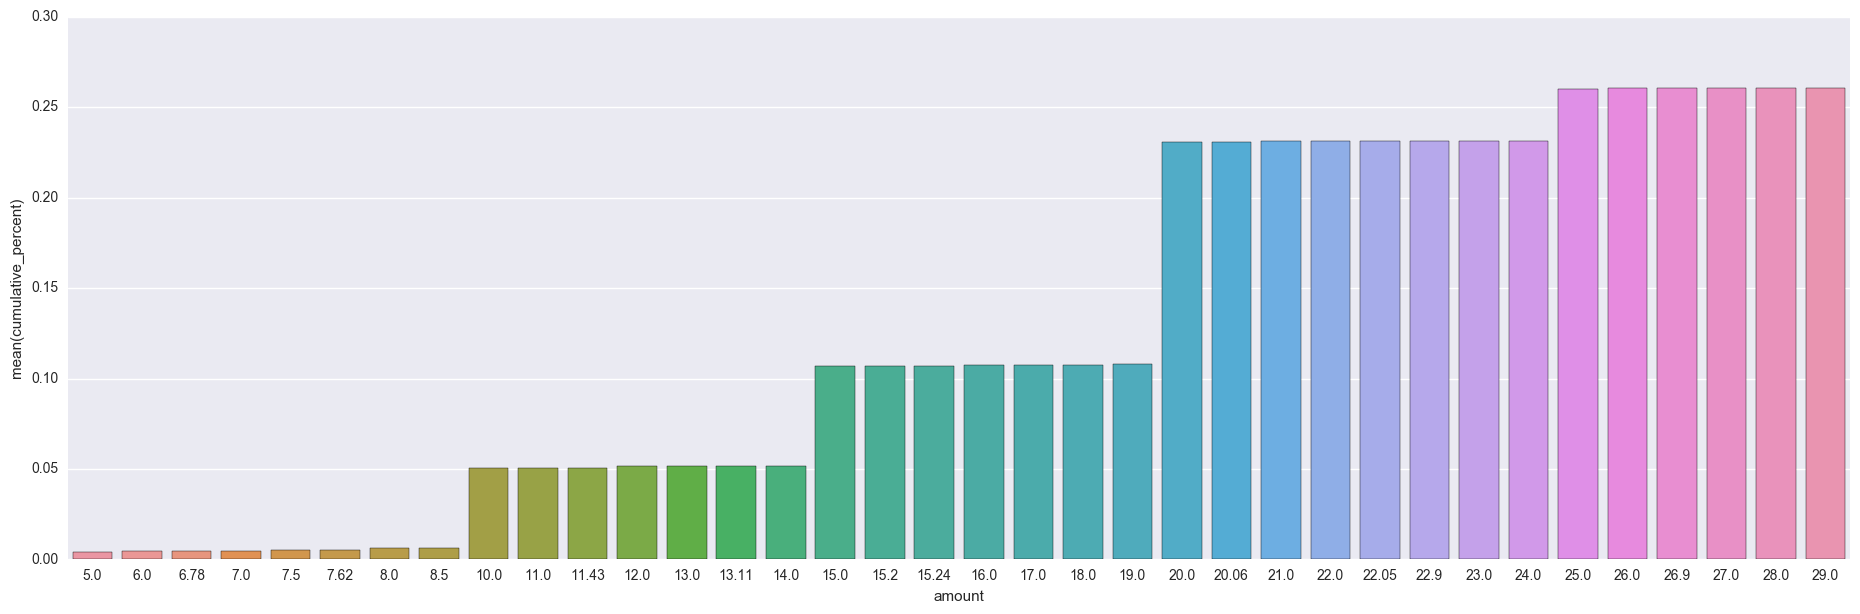

In [29]:
plt.figure(figsize=(23,7))
sns.barplot(x=amount_df.amount[amount_df.amount<30],y=amount_df.cumulative_percent);


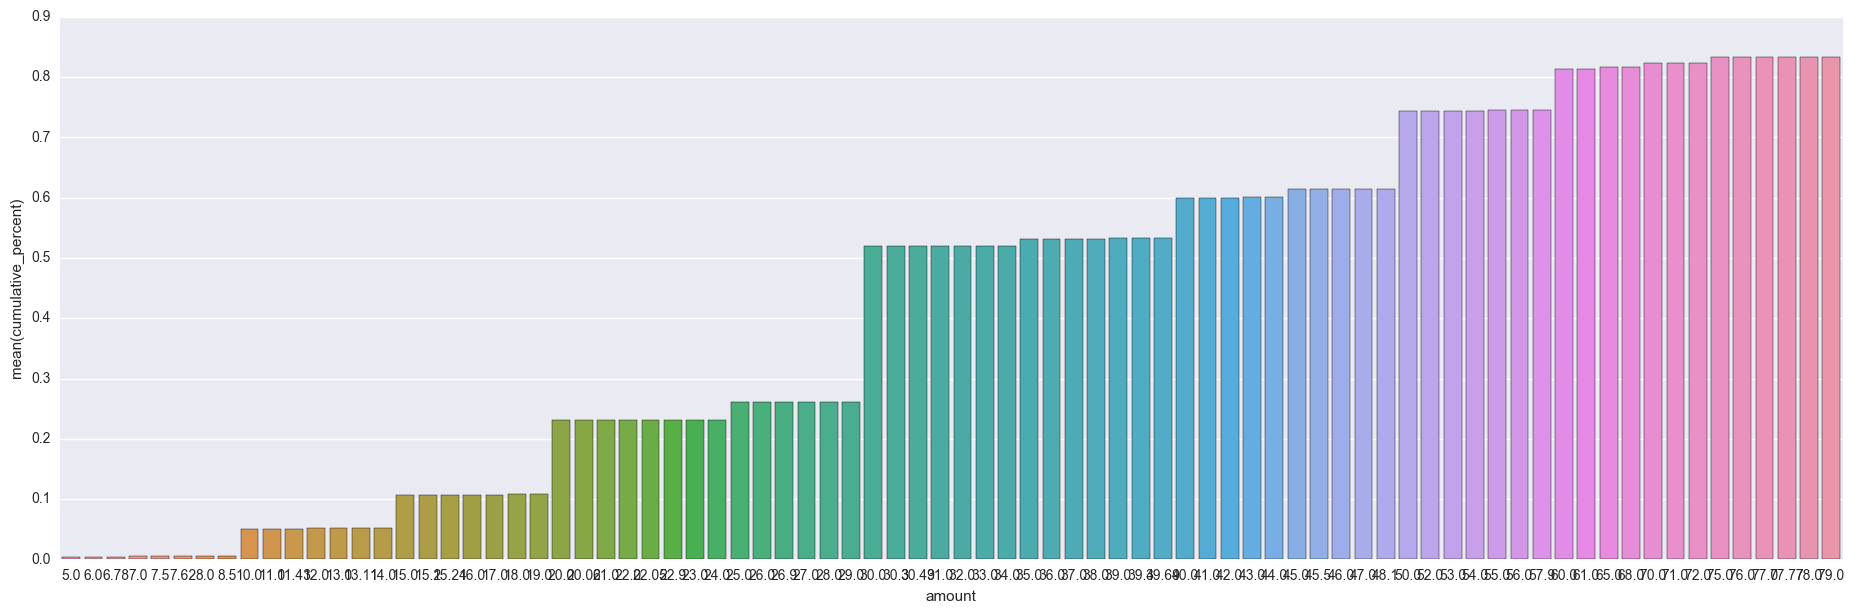

In [30]:
plt.figure(figsize=(23,7))
sns.barplot(x=amount_df.amount[amount_df.amount<80],y=amount_df.cumulative_percent);


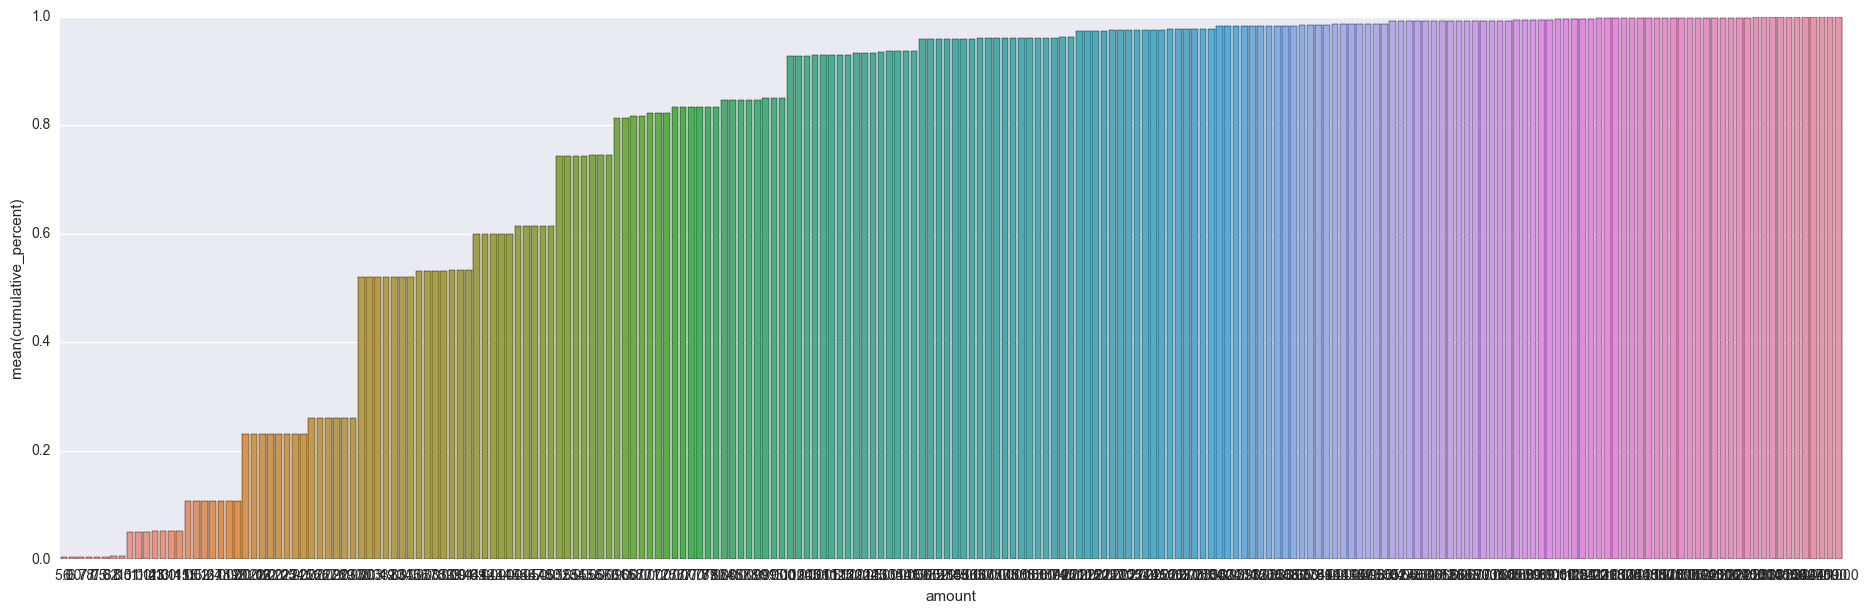

In [31]:
plt.figure(figsize=(23,7))
sns.barplot(x=amount_df.amount,y=amount_df.cumulative_percent);


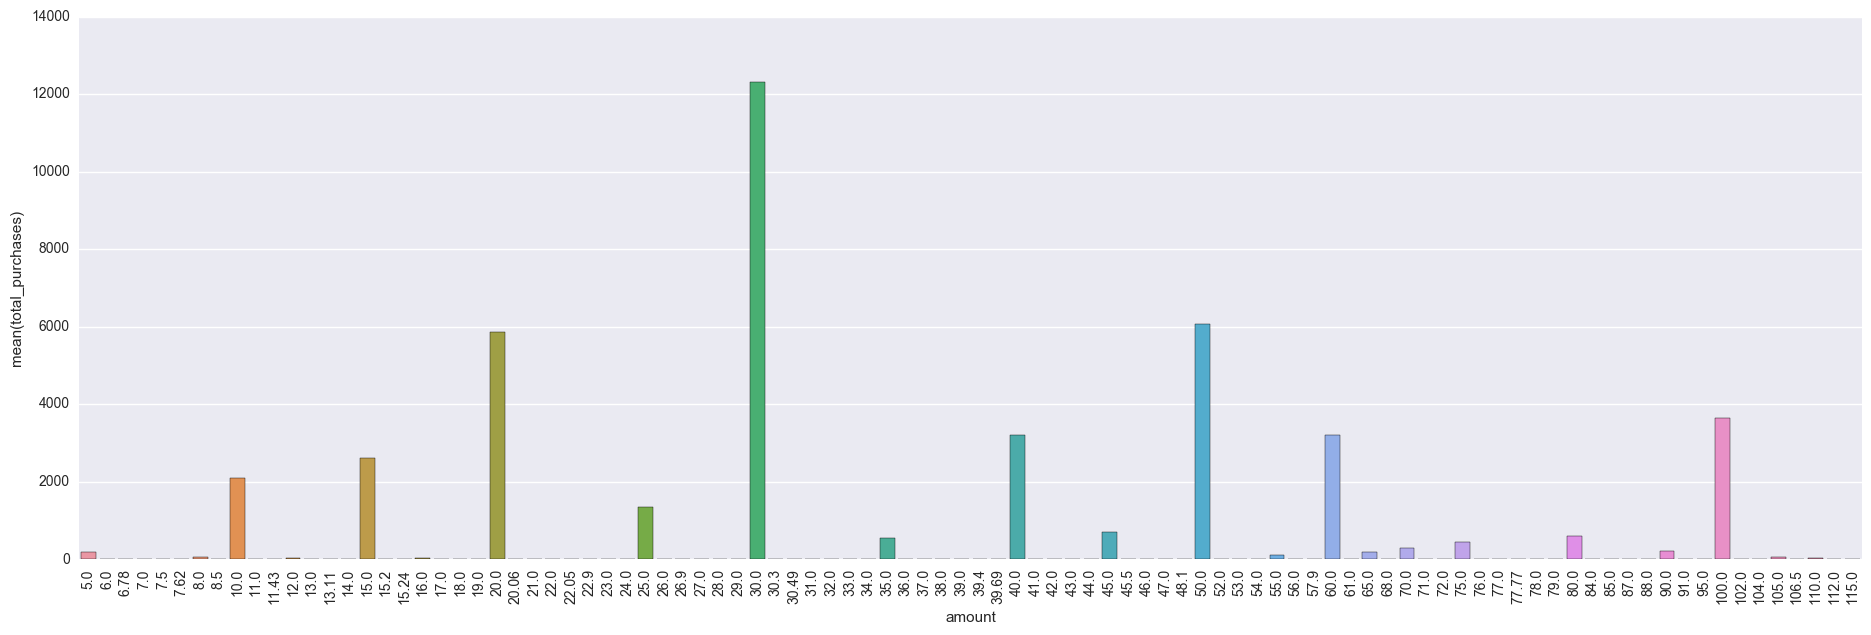

In [32]:
plt.figure(figsize=(23,7))
total = sns.barplot(x=amount_df.amount[amount_df.amount<120],y=amount_df.total_purchases)
for item in total.get_xticklabels():
    item.set_rotation(90)

total

> ### most popular amount is \$$30$. We will segment into two cohorts: $< \$30\ and > \$30$

----
# Frequency

In [33]:
frequency_df = state_df.groupby('customer_id').count().reset_index()

In [34]:
frequency_df.head()

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,quarters_since_purchase,state_one,state_two,state_three
0,80,6,6,6,6,6,6,6,6,6,6,6
1,90,8,8,8,8,8,8,8,8,8,8,8
2,120,1,1,1,1,1,1,1,1,1,1,1
3,130,1,1,1,1,1,1,1,1,1,1,1
4,160,1,1,1,1,1,1,1,1,1,1,1


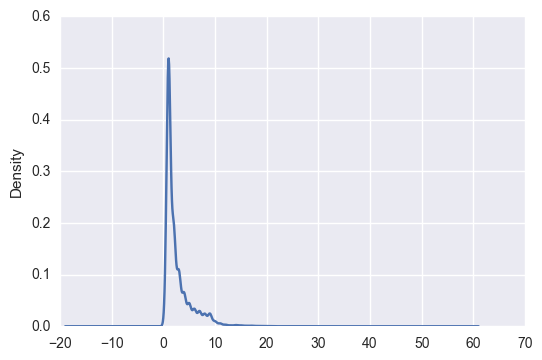

In [35]:
frequency_df.amount.plot(kind="kde")

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


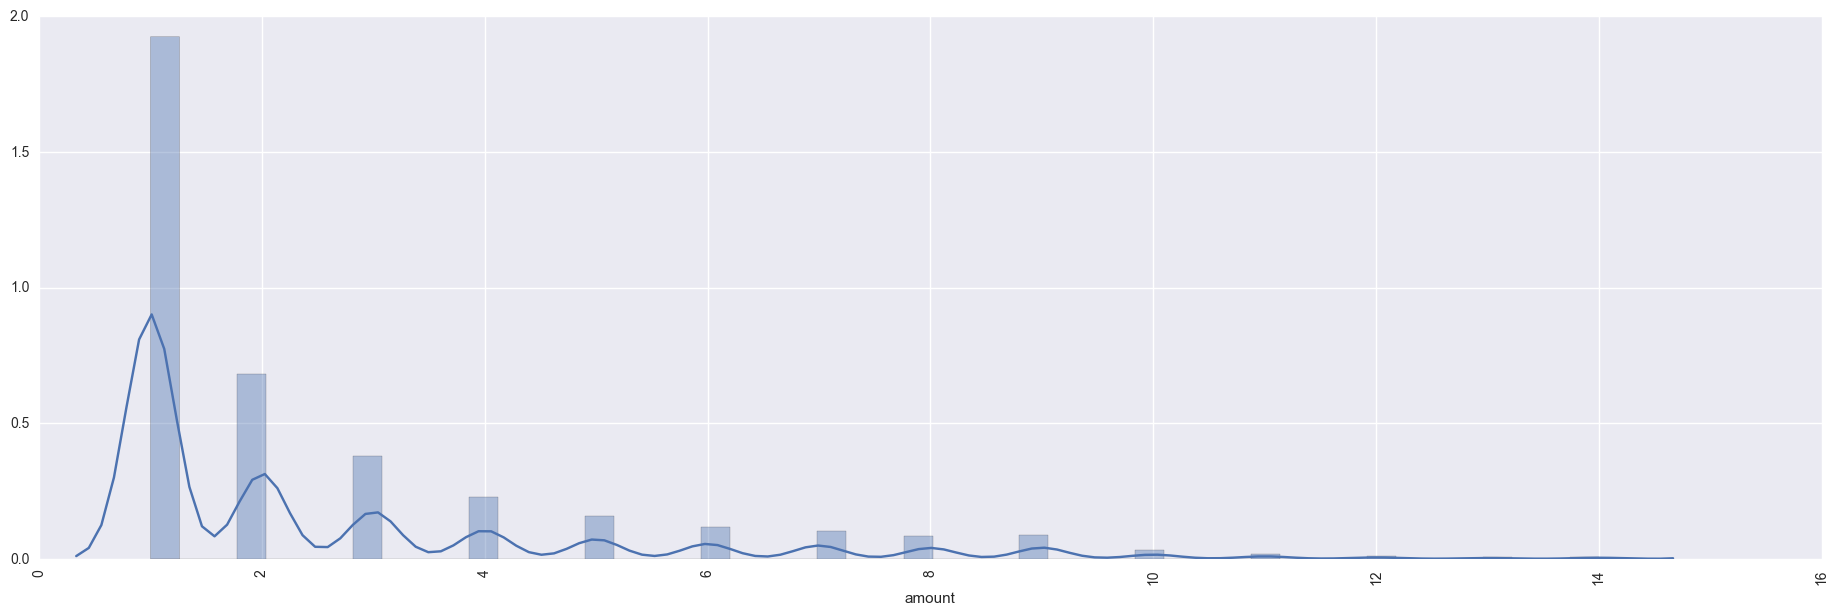

In [36]:
plt.figure(figsize=(23,7))
freq = sns.distplot(frequency_df.amount[frequency_df.amount<15])
for item in freq.get_xticklabels():
    item.set_rotation(90)

freq

> ### most popular frequency is 1 purchase. We will segment into two cohorts: $< 2 \ and > 2$ purchase

---
# Recency Matrix 

In [37]:
recency_df = state_df.ix[state_df.groupby('customer_id').date.idxmax(), :]
recency_df.days_since_purchase = recency_df.days_since_purchase.apply(lambda x:x.days)

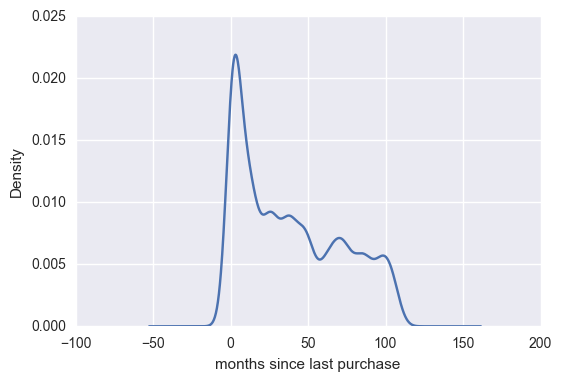

In [38]:
recency_df.months_since_purchase.plot(kind='kde')
plt.xlabel('months since last purchase')

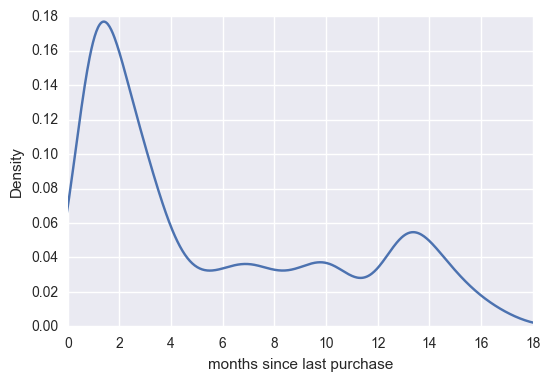

In [39]:
recency_df.months_since_purchase[recency_df.months_since_purchase<18].plot(kind='kde',xlim=[0,18])
plt.xlabel('months since last purchase')

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


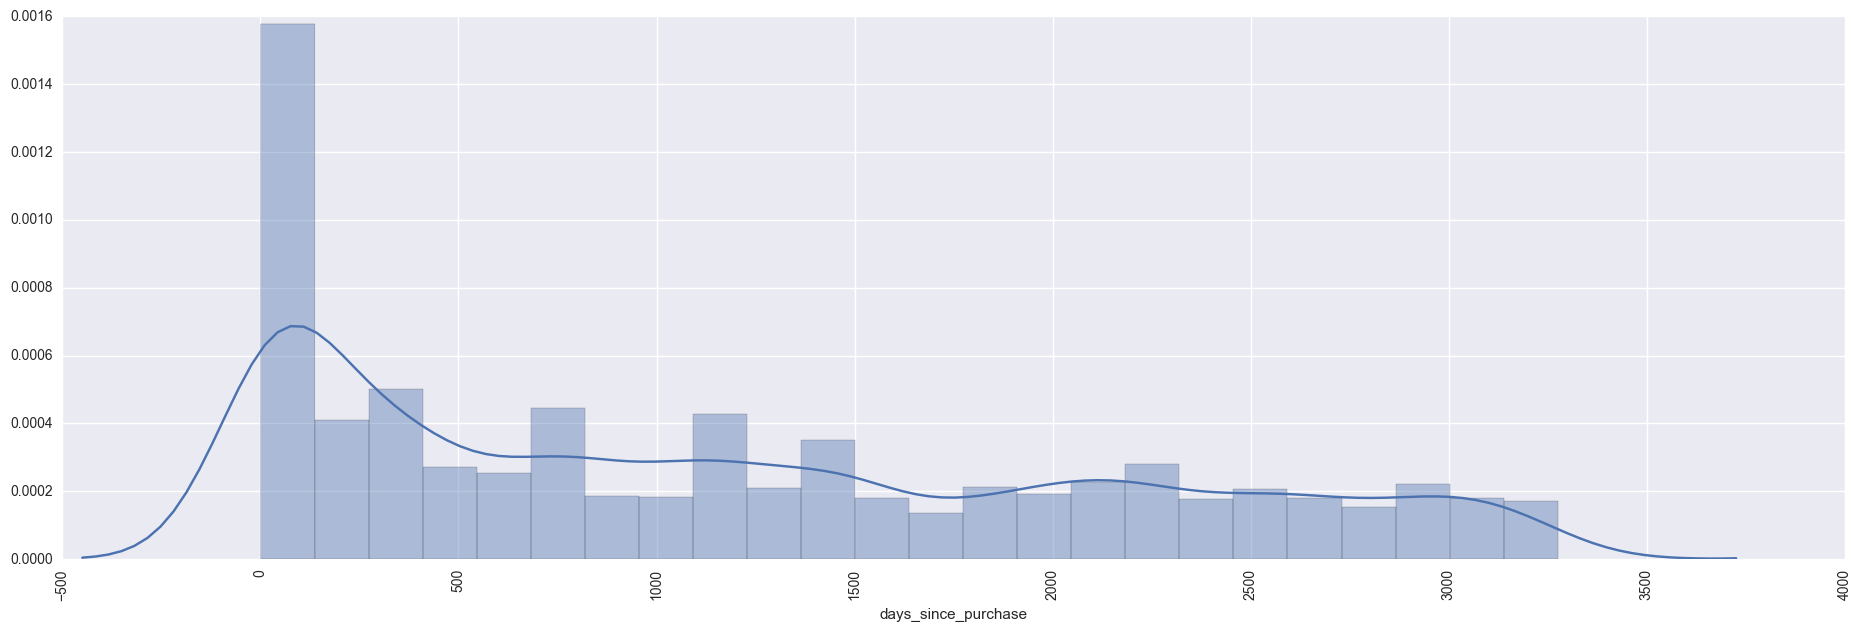

In [40]:
plt.figure(figsize=(23,7))
recency_plot = sns.distplot(recency_df.days_since_purchase)
for item in recency_plot.get_xticklabels():
    item.set_rotation(90)

recency_plot

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


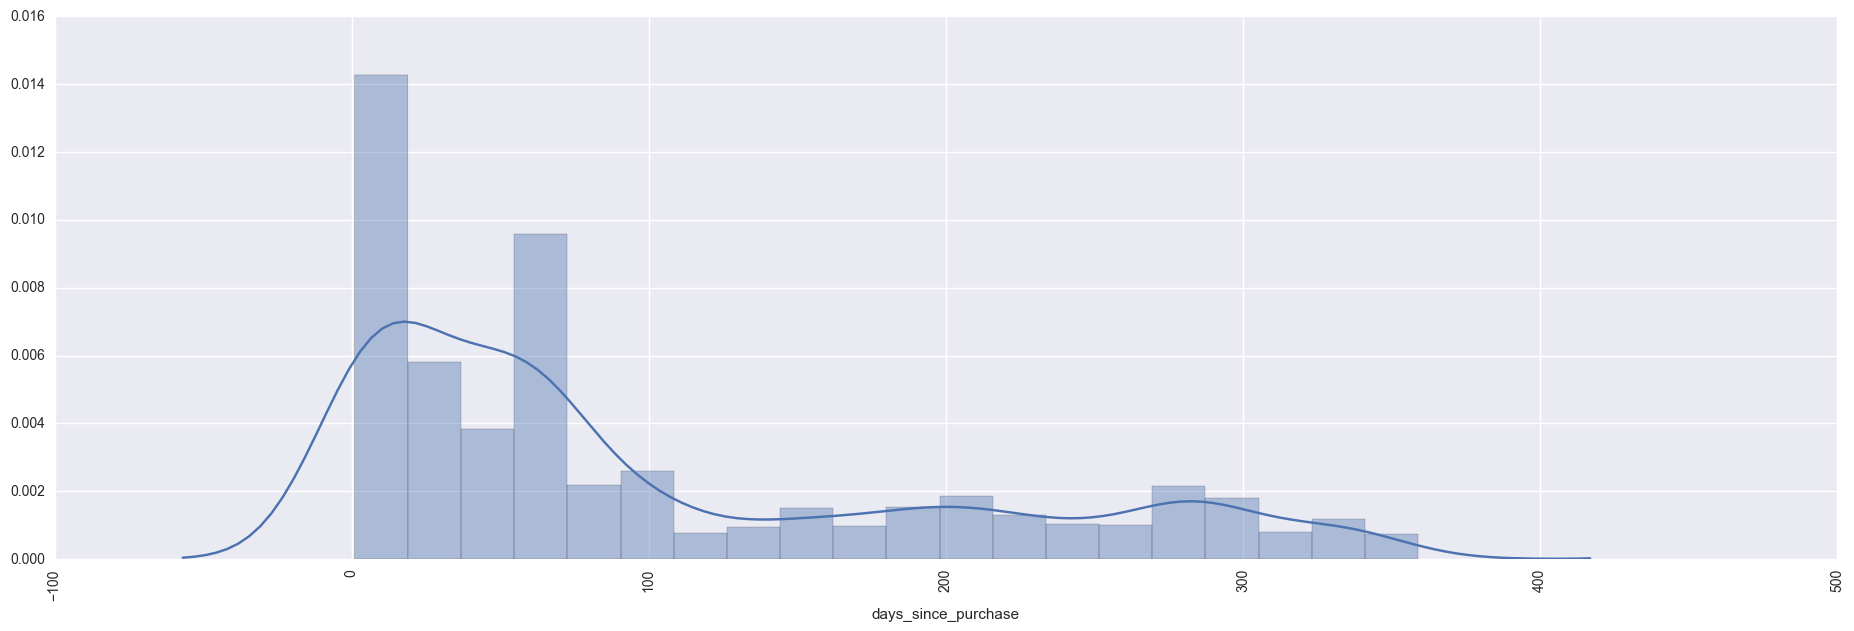

In [41]:
plt.figure(figsize=(23,7))
recency_plot = sns.distplot(recency_df.days_since_purchase[recency_df.days_since_purchase<360])
for item in recency_plot.get_xticklabels():
    item.set_rotation(90)

recency_plot

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


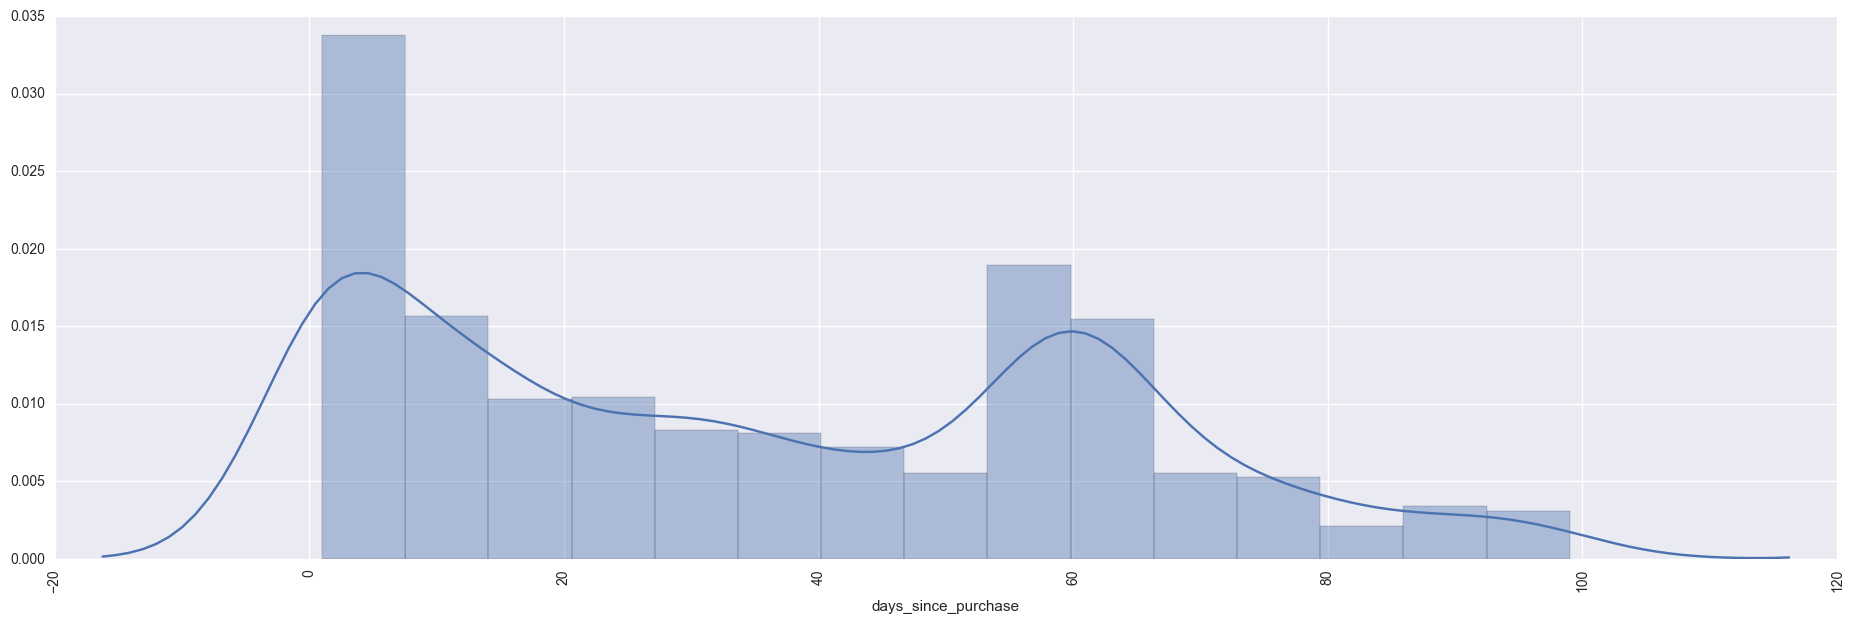

In [42]:
plt.figure(figsize=(23,7))
recency_plot = sns.distplot(recency_df.days_since_purchase[recency_df.days_since_purchase<100])
for item in recency_plot.get_xticklabels():
    item.set_rotation(90)

recency_plot

> ### Using days is too noisy, therefore let us use 12 months as the state segmentation. However, from the RFM data, we will actually use 2 years as the segmentation information.

---
# Transition Matrix
- Start with recency
- Use the states from the RFM segmentation , 1-<2 yrs, 2-<4 years, 4-<6 yrs

In [43]:
recency_df[(recency_df.months_since_purchase>12) & (recency_df.months_since_purchase<=24)]['customer_id'].count()

1958

In [44]:
# people who have purchase in last year
people_purchase_this_year = recency_df[recency_df.months_since_purchase<=12]['customer_id'].count()
people_purchase_year_two = recency_df[(recency_df.months_since_purchase>12) & (recency_df.months_since_purchase<=24)]['customer_id'].count()
people_purchase_year_three = recency_df[(recency_df.months_since_purchase>24) & (recency_df.months_since_purchase<=36)]['customer_id'].count()
people_purchase_year_four = recency_df[(recency_df.months_since_purchase>36) & (recency_df.months_since_purchase<=48)]['customer_id'].count()
people_purchase_year_five = recency_df[(recency_df.months_since_purchase>48) & (recency_df.months_since_purchase<=60)]['customer_id'].count()
people_purchase_year_six = recency_df[(recency_df.months_since_purchase>60) & (recency_df.months_since_purchase<=72)]['customer_id'].count()
people_purchase_year_seven = recency_df[(recency_df.months_since_purchase>72) & (recency_df.months_since_purchase<=84)]['customer_id'].count()
people_purchase_year_eight = recency_df[(recency_df.months_since_purchase>84) & (recency_df.months_since_purchase<=96)]['customer_id'].count()
people_purchase_year_nine = recency_df[(recency_df.months_since_purchase>96) & (recency_df.months_since_purchase<=108)]['customer_id'].count()


In [45]:
## transition matrix using the RFM recency states

people_purchase_this_thisyear_lesstwo = \
recency_df[(recency_df.months_since_purchase>0) & (recency_df.months_since_purchase<=24)]['customer_id'].count()

people_purchase_yeartwo_lessfour = recency_df[(recency_df.months_since_purchase>24) & \
                                              (recency_df.months_since_purchase<=48)]['customer_id'].count()
people_purchase_yearfour_lesssix = recency_df[(recency_df.months_since_purchase>48) & \
                                              (recency_df.months_since_purchase<=62)]['customer_id'].count()
people_purchase_yearsix_greater_churned = recency_df[(recency_df.months_since_purchase>=62)]['customer_id'].count()


In [46]:
total_customers = recency_df.customer_id.count()

In [47]:
state_probs = [float(people_purchase_this_year*1.0 / total_customers),
               float(people_purchase_year_two*1.0 / total_customers),
               float(people_purchase_year_three*1.0 / total_customers),
               float(people_purchase_year_four*1.0 / total_customers),
               float(people_purchase_year_five*1.0 / total_customers),
               float(people_purchase_year_six*1.0 / total_customers),
               float(people_purchase_year_seven*1.0 / total_customers),
               float(people_purchase_year_eight*1.0 / total_customers),
               float(people_purchase_year_nine*1.0 / total_customers),
              0]
state_probs_RFM_states = [float(people_purchase_this_thisyear_lesstwo*1.0 / total_customers),
                          float(people_purchase_yeartwo_lessfour*1.0 / total_customers),
                          float(people_purchase_yearfour_lesssix*1.0 / total_customers),
                          float(people_purchase_yearsix_greater_churned*1.0/total_customers)]

In [48]:
state_probs

[0.30464473164399797,
 0.1105028500479711,
 0.10739883740617416,
 0.10897906202381624,
 0.0725774592245612,
 0.0824538630848242,
 0.07477848637056267,
 0.06580506800609515,
 0.0728596421919973,
 0]

In [49]:
state_index = ['state_1',
               'state_2',
               'state_3',
               'state_4',
               'state_5',
               'state_6',
               'state_7',
               'state_8',
               'state_9',
               'state_10']
cols = ["state_{}".format(i+1) for i in range(len(state_index)-1)]

In [50]:
# state_probs.append(0)

In [51]:
trans_matrix = pd.DataFrame(0 ,index=state_index,columns=cols)

In [52]:
trans_matrix

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9
state_1,0,0,0,0,0,0,0,0,0
state_2,0,0,0,0,0,0,0,0,0
state_3,0,0,0,0,0,0,0,0,0
state_4,0,0,0,0,0,0,0,0,0
state_5,0,0,0,0,0,0,0,0,0
state_6,0,0,0,0,0,0,0,0,0
state_7,0,0,0,0,0,0,0,0,0
state_8,0,0,0,0,0,0,0,0,0
state_9,0,0,0,0,0,0,0,0,0
state_10,0,0,0,0,0,0,0,0,0


In [53]:
trans_matrix['state_1'] = state_probs
trans_matrix['state_2'] = [1-state_probs[0], 0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_matrix['state_3'] = [0, 1-state_probs[1], 0, 0, 0, 0, 0, 0, 0, 0]
trans_matrix['state_4'] = [0, 0, 1-state_probs[2], 0, 0, 0, 0, 0, 0, 0]
trans_matrix['state_5'] = [0, 0, 0, 1-state_probs[3], 0, 0, 0, 0, 0, 0]
trans_matrix['state_6'] = [0, 0, 0, 0, 1-state_probs[4],  0, 0, 0, 0, 0]
trans_matrix['state_7'] = [0, 0, 0, 0, 0, 1-state_probs[5], 0, 0, 0, 0]
trans_matrix['state_8'] = [0, 0, 0, 0, 0, 0, 1-state_probs[6], 0, 0, 0]
trans_matrix['state_9'] = [ 0, 0, 0, 0, 0, 0, 0, 1-state_probs[7], 0, 0]
trans_matrix['state_10'] = [0, 0, 0, 0, 0, 0, 0, 0, 1-state_probs[8], 0]
trans_matrix['state_11']= [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

---
## One-time Transition Matrix based upon Recency

In [54]:
trans_matrix

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,state_11
state_1,0.304645,0.695355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
state_2,0.110503,0.000000,0.889497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
state_3,0.107399,0.000000,0.000000,0.892601,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
state_4,0.108979,0.000000,0.000000,0.000000,0.891021,0.000000,0.000000,0.000000,0.000000,0.00000,0
state_5,0.072577,0.000000,0.000000,0.000000,0.000000,0.927423,0.000000,0.000000,0.000000,0.00000,0
state_6,0.082454,0.000000,0.000000,0.000000,0.000000,0.000000,0.917546,0.000000,0.000000,0.00000,0
state_7,0.074778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.925222,0.000000,0.00000,0
state_8,0.065805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.934195,0.00000,0
state_9,0.072860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.92714,0
state_10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1


In [55]:
## FOr RFM states 
state_probs_RFM_states.insert(4,0)

In [56]:
state_probs_RFM_states

[0.4151475816919691,
 0.21637789942999042,
 0.09385405496924205,
 0.27986906710310966,
 0]

In [57]:
state_probs_complement = np.zeros(shape=(5,6))
                          
for idx,i in enumerate(state_probs_RFM_states):
    state_probs_complement[idx,idx+1]=1-i

state_probs_complement[:,0]=state_probs_RFM_states

In [58]:
print(state_probs_complement)

[[ 0.41514758  0.58485242  0.          0.          0.          0.        ]
 [ 0.2163779   0.          0.7836221   0.          0.          0.        ]
 [ 0.09385405  0.          0.          0.90614595  0.          0.        ]
 [ 0.27986907  0.          0.          0.          0.72013093  0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]


In [59]:
pd.DataFrame(state_probs_RFM_states)

,0
0,0.415148
1,0.216378
2,0.093854
3,0.279869
4,0.000000


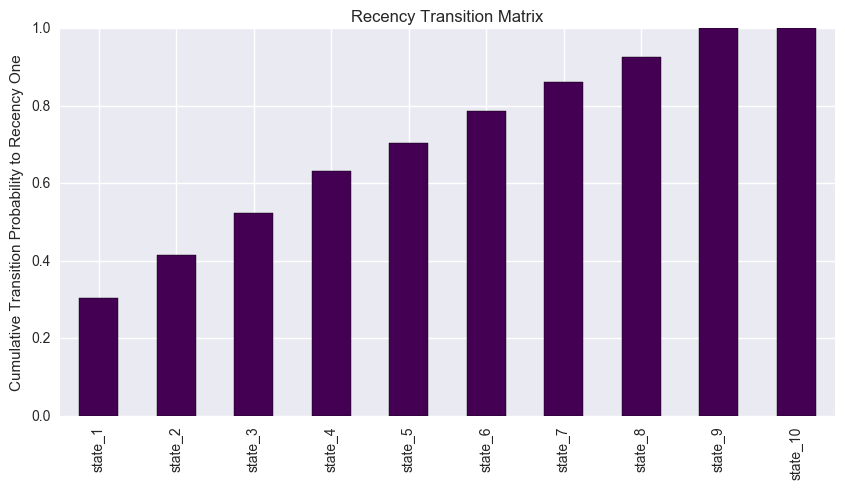

In [127]:
trans_matrix.state_1.cumsum().plot(kind='bar',colormap='viridis',figsize=(10,5))
plt.title('Recency Transition Matrix')
plt.ylabel('Cumulative Transition Probability to Recency One')

> ### Based on this table, let us group together state 1 and 2 (~40% of people), state 3 and4 (25%), and state 5 and 6 (20%) as our active states

---

# Next - segment on frequency and monetary value
- Monetary value > 30
- Frequency >2

`state 1: R < 2, F >=2, MV >=30
state 2: R <2 , F >=2 , MV <30
state 3: R <2 , F <2 , MV <30
state 4: R <2 , F <2 , MV >=30`

`state 5: R >=2-<4, F >=2, MV >=30
state 6: R 2-4, F >=2, MV <30
state 7: R 2-4, F<2, MV <30
state 8: R 2-4, F<2, MV >=30`

`state 9: R >=4-<6, F >=2, MV >=30
state 10: R 4-6, F >=2, MV <30
state 11: R 4-6, F<2, MV <30
state 12: R 4-6, F<2, MV >=30`
- Below, is defined as inactive

`state 13: R >=6-<8, F >=2, MV >=30
state 14: R 6-8, F >=2, MV <30
state 15: R 6-8, F<2, MV <30
state 16: R 6-8, F<2, MV >=30`

### First, define the expected reward vector for each state

In [61]:
# frequency flag less than 2
frequency_less2 = (state_df.groupby('customer_id').count()<2).reset_index()
frequency_less2 = frequency_less2[['customer_id','amount']]
frequency_less2['one_purchase']=frequency_less2['amount']

## frequency flag greater than or equal to 2
frequency_more2 = (state_df.groupby('customer_id').count()>=2).reset_index()
frequency_more2 = frequency_more2[['customer_id','amount']]
frequency_more2['2_or_more_purchases']=frequency_more2['amount']
# amount flag less than 30
amount_less30 = (state_df.groupby('customer_id').mean()<30).reset_index()
amount_less30 = amount_less30[['customer_id','amount']]
amount_less30['average_amount_<_30'] = amount_less30['amount']

# amount flag more than
amount_more30 = (state_df.groupby('customer_id').mean()>=30).reset_index()
amount_more30 = amount_more30[['customer_id','amount']]
amount_more30['average_amount_=>_30'] = amount_more30['amount']

# Recency 1-<2 years
recency_1_2 = state_df.ix[state_df.groupby('customer_id').date.idxmax(),:]
recency_1_2['purchased_in_past_1<2_yrs.']=recency_1_2.years_since_purchase<2
recency_1_2.drop(recency_1_2[['amount','date','month','days_since_purchase','months_since_purchase',
                  'years_since_purchase','state_one','state_two','state_three','year']],axis=1,inplace=True)

# Recency 2->4 yrs
recency_more2_less4 = state_df.ix[state_df.groupby('customer_id').date.idxmax(),:]
recency_more2_less4['purchased_in_past_>=2<4_yrs.']=(recency_more2_less4.years_since_purchase>=2 )\
                                                    & (recency_more2_less4.years_since_purchase<4) 
recency_more2_less4.drop(recency_more2_less4[['amount','date','month','days_since_purchase','months_since_purchase',
                  'years_since_purchase','state_one','state_two','state_three','year']],axis=1,inplace=True)

# Recency 4-<6 yrs
recency_more4_less6 = state_df.ix[state_df.groupby('customer_id').date.idxmax(),:]
recency_more4_less6['purchased_in_past_>=4<6_yrs.']=(recency_more4_less6.years_since_purchase>=4 )\
                                                    & (recency_more4_less6.years_since_purchase<6) 
recency_more4_less6.drop(recency_more4_less6[['amount','date','month','days_since_purchase','months_since_purchase',
                  'years_since_purchase','state_one','state_two','state_three','year']],axis=1,inplace=True)

# Recency 6-<8 yrs
recency_more6_less8 = state_df.ix[state_df.groupby('customer_id').date.idxmax(),:]
recency_more6_less8['purchased_in_past_>=6<8_yrs.']=(recency_more6_less8.years_since_purchase>=6 )\
                                                    & (recency_more6_less8.years_since_purchase<8) 
recency_more6_less8.drop(recency_more6_less8[['amount','date','month','days_since_purchase','months_since_purchase',
                  'years_since_purchase','state_one','state_two','state_three','year']],axis=1,inplace=True)

In [62]:
### merge everything now
reward_state = state_df.copy()
reward_states_list = [frequency_less2,frequency_more2,amount_more30,amount_less30,recency_1_2,\
                  recency_more2_less4,recency_more4_less6,recency_more6_less8]

for dataframe in reward_states_list:
    temp =pd.merge(reward_state,dataframe,on='customer_id')
    reward_state = temp

In [63]:
# clean up
reward_state = reward_state.drop(labels=\
        ['amount','state_one','state_two','state_three','date','month','year','days_since_purchase'],axis=1)

- Next, calculate total $$ per state

In [64]:
state_one_reward = np.sum(reward_state[(reward_state['purchased_in_past_1<2_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]
state_two_reward = np.sum(reward_state[(reward_state['purchased_in_past_1<2_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]
state_three_reward = np.sum(reward_state[(reward_state['purchased_in_past_1<2_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]
state_four_reward = np.sum(reward_state[(reward_state['purchased_in_past_1<2_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]
state_five_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=2<4_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]
state_six_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=2<4_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]
state_seven_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=2<4_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]
state_eight_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=2<4_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]
state_nine_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=4<6_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]
state_ten_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=4<6_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]
state_elleven_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=4<6_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]
state_twelve_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=4<6_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]
state_thirteen_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=6<8_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]
state_fourteen_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=6<8_yrs.']==True) & \
                                        (reward_state['2_or_more_purchases']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]
state_fifteen_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=6<8_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_<_30']==True)].amount_x).reset_index().iloc[0,1]
state_sixteen_reward = np.sum(reward_state[(reward_state['purchased_in_past_>=6<8_yrs.']==True) & \
                                        (reward_state['one_purchase']==True) &\
             (reward_state['average_amount_=>_30']==True)].amount_x).reset_index().iloc[0,1]

In [65]:
## turn these number into a reward vector
reward_vector = [state_one_reward,state_two_reward,state_three_reward,state_four_reward,state_five_reward,state_six_reward,\
                state_seven_reward,state_eight_reward,state_nine_reward,state_ten_reward,state_elleven_reward,\
                state_twelve_reward]

In [66]:
#average amount per RFM state
reward_vector

[1424962.6200000001,
 117285.2,
 7020.6199999999999,
 107535.21000000001,
 442699.39000000001,
 45419.550000000003,
 8382.5,
 107781.68000000001,
 255424.85000000001,
 36750.0,
 8718.0,
 74367.339999999997]

In [67]:
reward_vector.append(0)

In [68]:
reward_vector

[1424962.6200000001,
 117285.2,
 7020.6199999999999,
 107535.21000000001,
 442699.39000000001,
 45419.550000000003,
 8382.5,
 107781.68000000001,
 255424.85000000001,
 36750.0,
 8718.0,
 74367.339999999997,
 0]

----
# Create the recency transition matrix

In [69]:
RFM_df = pd.DataFrame()

In [70]:
recency_df = recency_df[['customer_id','years_since_purchase']]
recency_df.head()

,customer_id,years_since_purchase
16131,80,1
16859,90,3
32193,120,4
4073,130,9
42643,160,9


In [71]:
frequency_df = frequency_df[['customer_id','amount']]
frequency_df['number_of_purchases']=frequency_df['amount']
frequency_df.head()

,customer_id,amount,number_of_purchases
0,80,6,6
1,90,8,8
2,120,1,1
3,130,1,1
4,160,1,1


In [72]:
 monetary_df = state_df.groupby(['customer_id']).mean().reset_index()
monetary_df = monetary_df[['customer_id','amount']]
monetary_df['avg_amount_spent']=monetary_df['amount']
monetary_df.head()

,customer_id,amount,avg_amount_spent
0,80,75.000,75.000
1,90,106.875,106.875
2,120,20.000,20.000
3,130,60.000,60.000
4,160,30.000,30.000


In [73]:
merged = pd.merge(frequency_df, monetary_df, on='customer_id')

In [74]:
RMF_df = pd.merge(merged, recency_df, on='customer_id')

In [75]:
RMF_df.head()

,customer_id,amount_x,number_of_purchases,amount_y,avg_amount_spent,years_since_purchase
0,80,6,6,75.000,75.000,1
1,90,8,8,106.875,106.875,3
2,120,1,1,20.000,20.000,4
3,130,1,1,60.000,60.000,9
4,160,1,1,30.000,30.000,9


In [76]:
assert(RMF_df.amount_x.all() == RMF_df.number_of_purchases.all())

In [77]:
RMF_df.drop(['amount_x', 'amount_y'], axis=1, inplace=True)

---
## Recency-Monetary-Frequency Data

In [78]:
RMF_df.head()

,customer_id,number_of_purchases,avg_amount_spent,years_since_purchase
0,80,6,75.000,1
1,90,8,106.875,3
2,120,1,20.000,4
3,130,1,60.000,9
4,160,1,30.000,9


In [79]:
RMF_segments_df = pd.DataFrame(columns=['creme', 'high', 'medium', 'low'])

In [80]:
rmf_state_1 = RMF_df[(RMF_df.years_since_purchase<2) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_2 = RMF_df[(RMF_df.years_since_purchase<2) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_3 = RMF_df[(RMF_df.years_since_purchase<2) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_4 = RMF_df[(RMF_df.years_since_purchase<2) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_5 = RMF_df[(RMF_df.years_since_purchase.isin(range(2,4))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_6 = RMF_df[(RMF_df.years_since_purchase.isin(range(2,4))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_7 = RMF_df[(RMF_df.years_since_purchase.isin(range(2,4))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_8 = RMF_df[(RMF_df.years_since_purchase.isin(range(2,4))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_9 = RMF_df[(RMF_df.years_since_purchase.isin(range(4,6))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_10 = RMF_df[(RMF_df.years_since_purchase.isin(range(4,6))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_11 = RMF_df[(RMF_df.years_since_purchase.isin(range(4,6))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_12 = RMF_df[(RMF_df.years_since_purchase.isin(range(4,6))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_13 = RMF_df[(RMF_df.years_since_purchase.isin(range(6,8))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_14 = RMF_df[(RMF_df.years_since_purchase.isin(range(6,8))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_15 = RMF_df[(RMF_df.years_since_purchase.isin(range(6,8))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_16 = RMF_df[(RMF_df.years_since_purchase.isin(range(6,8))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()

In [86]:
rmf_probs = [float(rmf_state_1*1.0 / total_customers),
              float(rmf_state_2*1.0 / total_customers),
              float(rmf_state_3*1.0 / total_customers),
              float(rmf_state_4*1.0 / total_customers),
              float(rmf_state_5*1.0 / total_customers),
              float(rmf_state_6*1.0 / total_customers),
              float(rmf_state_7*1.0 / total_customers),
              float(rmf_state_8*1.0 / total_customers),
              float(rmf_state_9*1.0 / total_customers),
              float(rmf_state_10*1.0 / total_customers),
              float(rmf_state_11*1.0 / total_customers),
              float(rmf_state_12*1.0 / total_customers),]
rmf_probs
rmf_probs.append(0)
print(rmf_probs,len(rmf_probs))


[0.1688582877137536, 0.05237315875613748, 0.02263107398837406, 0.06078221118573283, 0.07466561318358823, 0.029967831141712285, 0.030193577515661155, 0.0830746656131836, 0.05468705908911338, 0.03154805575935436, 0.030983689824482193, 0.0643377165754275, 0] 13


---
## One-time RMF Transition Matrix

In [89]:
transRMFrows = ['state{}'.format(i) for i in range(1, len(rmf_probs))]
transRMFrows.append('inactive')
print(transRMFrows)

['state1', 'state2', 'state3', 'state4', 'state5', 'state6', 'state7', 'state8', 'state9', 'state10', 'state11', 'state12', 'inactive']


In [90]:
trans_RMF_df = pd.DataFrame(0, columns=transRMFrows, index=transRMFrows)
trans_RMF_df

,state1,state2,state3,state4,state5,state6,state7,state8,state9,state10,state11,state12,inactive
state1,0,0,0,0,0,0,0,0,0,0,0,0,0
state2,0,0,0,0,0,0,0,0,0,0,0,0,0
state3,0,0,0,0,0,0,0,0,0,0,0,0,0
state4,0,0,0,0,0,0,0,0,0,0,0,0,0
state5,0,0,0,0,0,0,0,0,0,0,0,0,0
state6,0,0,0,0,0,0,0,0,0,0,0,0,0
state7,0,0,0,0,0,0,0,0,0,0,0,0,0
state8,0,0,0,0,0,0,0,0,0,0,0,0,0
state9,0,0,0,0,0,0,0,0,0,0,0,0,0
state10,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
rmf_probs

[0.1688582877137536,
 0.05237315875613748,
 0.02263107398837406,
 0.06078221118573283,
 0.07466561318358823,
 0.029967831141712285,
 0.030193577515661155,
 0.0830746656131836,
 0.05468705908911338,
 0.03154805575935436,
 0.030983689824482193,
 0.0643377165754275,
 0]

In [92]:
trans_RMF_df['state1'] = [i/4 for i in rmf_probs]
trans_RMF_df['state2'] = [rmf_probs[0]/4, rmf_probs[1]/4,rmf_probs[2]/4, rmf_probs[3]/4, rmf_probs[4]/4,\
                          rmf_probs[5]/4, rmf_probs[6]/4, rmf_probs[7]/4, rmf_probs[8]/4, rmf_probs[9]/4,\
                          rmf_probs[10]/4, rmf_probs[11]/4,rmf_probs[12]/4]
trans_RMF_df['state3'] = [rmf_probs[0]/4, rmf_probs[1]/4, rmf_probs[2]/4,rmf_probs[3]/4, rmf_probs[4]/4,\
                          rmf_probs[5]/4, rmf_probs[6]/4, rmf_probs[7]/4, rmf_probs[8]/4, rmf_probs[9]/4,\
                          rmf_probs[10]/4, rmf_probs[11]/4,rmf_probs[12]/4]
trans_RMF_df['state4'] = [rmf_probs[0]/4, rmf_probs[1]/4, rmf_probs[2]/4, rmf_probs[3]/4,rmf_probs[4]/4,\
                          rmf_probs[5]/4, rmf_probs[6]/4, rmf_probs[7]/4, rmf_probs[8]/4, rmf_probs[9]/4,\
                          rmf_probs[10]/4, rmf_probs[11]/4,rmf_probs[12]/4]
trans_RMF_df['state5'] = [(1-rmf_probs[0])/4, (1-rmf_probs[1])/4,  (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state6'] = [(1-rmf_probs[0])/4, (1-rmf_probs[1])/4,  (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state7'] = [(1-rmf_probs[0])/4, (1-rmf_probs[1])/4, (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state8'] = [(1-rmf_probs[0])/4,  (1-rmf_probs[1])/4, (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state9'] = [0, 0, 0, 0, (1-rmf_probs[4])/4, (1-rmf_probs[5])/4, (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                          0, 0, 0, 0, 0]
trans_RMF_df['state10'] = [0, 0, 0, 0, (1-rmf_probs[4])/4, (1-rmf_probs[5])/4, (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                           0, 0, 0, 0, 0]
trans_RMF_df['state11'] = [0, 0, 0, 0, (1-rmf_probs[4])/4, (1-rmf_probs[5])/4, (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                           0, 0, 0, 0, 0]
trans_RMF_df['state12'] = [0, 0, 0, 0, (1-rmf_probs[4])/4, (1-rmf_probs[5])/4, (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                           0, 0, 0, 0, 0]
trans_RMF_df['inactive']=[0, 0, 0, 0, 0, 0, 0, 0, 1-rmf_probs[8], 1-rmf_probs[9],1-rmf_probs[10],1-rmf_probs[11], 1]

# rmf_probs[0]
# rmf_probs[1]
# rmf_probs[2]
# rmf_probs[3]
# rmf_probs[4]
# rmf_probs[5]
# rmf_probs[6]
# rmf_probs[7]
# rmf_probs[8]
# rmf_probs[9]
# rmf_probs[10]

# rmf_probs[11]
rmf_probs

[0.1688582877137536,
 0.05237315875613748,
 0.02263107398837406,
 0.06078221118573283,
 0.07466561318358823,
 0.029967831141712285,
 0.030193577515661155,
 0.0830746656131836,
 0.05468705908911338,
 0.03154805575935436,
 0.030983689824482193,
 0.0643377165754275,
 0]

In [93]:
trans_RMF_df

,state1,state2,state3,state4,state5,state6,state7,state8,state9,state10,state11,state12,inactive
state1,0.042215,0.042215,0.042215,0.042215,0.207785,0.207785,0.207785,0.207785,0.000000,0.000000,0.000000,0.000000,0.000000
state2,0.013093,0.013093,0.013093,0.013093,0.236907,0.236907,0.236907,0.236907,0.000000,0.000000,0.000000,0.000000,0.000000
state3,0.005658,0.005658,0.005658,0.005658,0.244342,0.244342,0.244342,0.244342,0.000000,0.000000,0.000000,0.000000,0.000000
state4,0.015196,0.015196,0.015196,0.015196,0.234804,0.234804,0.234804,0.234804,0.000000,0.000000,0.000000,0.000000,0.000000
state5,0.018666,0.018666,0.018666,0.018666,0.000000,0.000000,0.000000,0.000000,0.231334,0.231334,0.231334,0.231334,0.000000
state6,0.007492,0.007492,0.007492,0.007492,0.000000,0.000000,0.000000,0.000000,0.242508,0.242508,0.242508,0.242508,0.000000
state7,0.007548,0.007548,0.007548,0.007548,0.000000,0.000000,0.000000,0.000000,0.242452,0.242452,0.242452,0.242452,0.000000
state8,0.020769,0.020769,0.020769,0.020769,0.000000,0.000000,0.000000,0.000000,0.229231,0.229231,0.229231,0.229231,0.000000
state9,0.013672,0.013672,0.013672,0.013672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.945313
state10,0.007887,0.007887,0.007887,0.007887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.968452


---
# NPV Calculation

In [94]:
pd.DataFrame(np.linalg.matrix_power((1/(1+.1))*trans_RMF_df,10)).dot(reward_vector)

0     38.672386
1     33.010713
2     31.565121
3     33.419429
4     14.324877
5     11.197428
6     11.213223
7     14.913249
8      4.324073
9      2.494486
10     2.449862
11     5.087145
12     0.000000
dtype: float64

In [95]:
ten_years_val = sum(pd.DataFrame(np.linalg.matrix_power((1/(1+.1))*trans_RMF_df,10)).dot(reward_vector))

In [96]:
def NPV_calc(r, t, P, R):
    annual_returns = []
    for i in range(1, t+1):
        annual_returns.append(round(sum(pd.DataFrame(np.linalg.matrix_power((1/(1+r))*P, i)).dot(R)), 2))
    return sum(annual_returns), annual_returns

In [97]:
print("value of the database at year 10 is ${}.".format(round(ten_years_val, 2)))

value of the database at year 10 is $202.67.


In [98]:
((1/(1+.1))*trans_RMF_df).dot(reward_vector)

state1      177729.530563
state2      149865.214730
state3      142750.634088
state4      151876.737530
state5      107033.504151
state6       94014.833639
state7       94080.584500
state8      109482.723729
state9       20592.208888
state10      11879.303166
state11      11666.793271
state12      24226.128103
inactive         0.000000
dtype: float64

In [99]:
((1/(1+.1))*trans_RMF_df).dot(trans_RMF_df).dot(reward_vector)

state1      110339.244380
state2      104002.148439
state3      102384.101171
state4      104459.622904
state5       27429.639246
state6       21240.586741
state7       21271.844582
state8       28593.993820
state9        8506.874419
state10       4907.474510
state11       4819.684268
state12      10008.087551
inactive         0.000000
dtype: float64

In [100]:
# two periods
((1/(1+.1))*trans_RMF_df).dot(trans_RMF_df).dot(trans_RMF_df).dot(reward_vector)

state1      38254.507732
state2      28858.553610
state3      26459.489742
state4      29536.846809
state5      14395.362625
state6      10004.442526
state7      10026.618890
state8      15221.432189
state9       5758.343844
state10      3321.892888
state11      3262.467255
state12      6774.522169
inactive        0.000000
dtype: float64

---
## Annual revenues for the next 10 years

* Note: these numbers are in terms of TODAY'S dollars

In [101]:
value_of_DB, revenues = NPV_calc(.1, 10, trans_RMF_df, reward_vector)

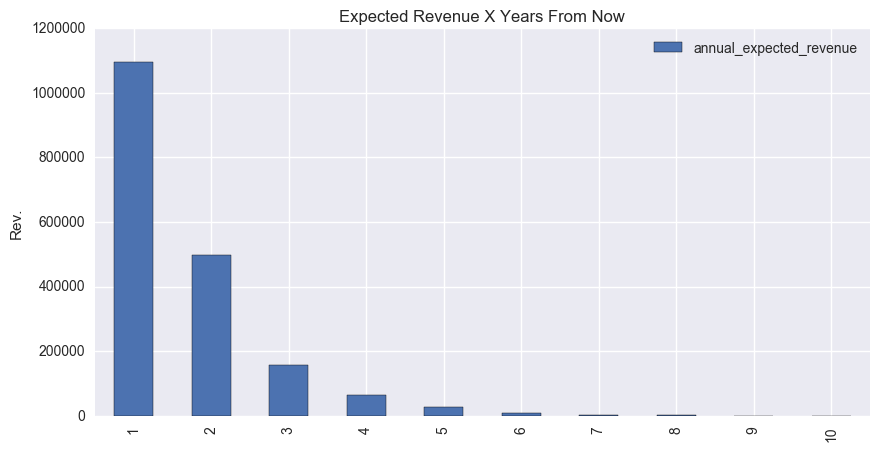

In [102]:

rev_index = range(1, 11)
plt.figure(figsize=(10,5))
pd.DataFrame(revenues, index=rev_index, columns=['annual_expected_revenue']).plot(kind='bar',figsize=(10,5))
plt.title('Expected Revenue X Years From Now')
plt.ylabel('Rev.')


In [103]:
print("Database will be worth ${} in 2025".format(value_of_DB))

Database will be worth $1857080.48 in 2025


In [104]:
Database will be worth $1,857,080.48 in 2025

SyntaxError: invalid syntax (<ipython-input-104-172a9a627d2e>, line 1)

# Create new RFM transition matrices with higher probabilities of Cash Cows (states, 1) returning to recency one (years one to two).
- 5% higher probability

In [105]:
trans_RMF_df_probchanged = trans_RMF_df

In [106]:
(0.013672*.05+0.013672)

0.0143556

In [107]:
(0.013672*.05)

0.0006836

In [108]:
trans_RMF_df_probchanged 

,state1,state2,state3,state4,state5,state6,state7,state8,state9,state10,state11,state12,inactive
state1,0.042215,0.042215,0.042215,0.042215,0.207785,0.207785,0.207785,0.207785,0.000000,0.000000,0.000000,0.000000,0.000000
state2,0.013093,0.013093,0.013093,0.013093,0.236907,0.236907,0.236907,0.236907,0.000000,0.000000,0.000000,0.000000,0.000000
state3,0.005658,0.005658,0.005658,0.005658,0.244342,0.244342,0.244342,0.244342,0.000000,0.000000,0.000000,0.000000,0.000000
state4,0.015196,0.015196,0.015196,0.015196,0.234804,0.234804,0.234804,0.234804,0.000000,0.000000,0.000000,0.000000,0.000000
state5,0.018666,0.018666,0.018666,0.018666,0.000000,0.000000,0.000000,0.000000,0.231334,0.231334,0.231334,0.231334,0.000000
state6,0.007492,0.007492,0.007492,0.007492,0.000000,0.000000,0.000000,0.000000,0.242508,0.242508,0.242508,0.242508,0.000000
state7,0.007548,0.007548,0.007548,0.007548,0.000000,0.000000,0.000000,0.000000,0.242452,0.242452,0.242452,0.242452,0.000000
state8,0.020769,0.020769,0.020769,0.020769,0.000000,0.000000,0.000000,0.000000,0.229231,0.229231,0.229231,0.229231,0.000000
state9,0.013672,0.013672,0.013672,0.013672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.945313
state10,0.007887,0.007887,0.007887,0.007887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.968452


In [109]:
p = [i/4 for i in rmf_probs]
p[0]=0.04432575
p[4]=0.0195993
p[8]=0.0143556
print(p,len(p))
trans_RMF_df_probchanged ['state1'] =  p
trans_RMF_df_probchanged ['state2'] = [0.04432575, rmf_probs[1]/4,rmf_probs[2]/4, rmf_probs[3]/4, 0.0195993,\
                          rmf_probs[5]/4, rmf_probs[6]/4, rmf_probs[7]/4, 0.0143556, rmf_probs[9]/4,\
                          rmf_probs[10]/4, rmf_probs[11]/4,rmf_probs[12]/4]
trans_RMF_df_probchanged ['state3'] = [0.04432575, rmf_probs[1]/4, rmf_probs[2]/4,rmf_probs[3]/4, 0.0195993,\
                          rmf_probs[5]/4, rmf_probs[6]/4, rmf_probs[7]/4, 0.0143556, rmf_probs[9]/4,\
                          rmf_probs[10]/4, rmf_probs[11]/4,rmf_probs[12]/4]
trans_RMF_df_probchanged ['state4'] = [0.04432575, rmf_probs[1]/4, rmf_probs[2]/4, rmf_probs[3]/4,0.0195993,\
                          rmf_probs[5]/4, rmf_probs[6]/4, rmf_probs[7]/4, 0.0143556, rmf_probs[9]/4,\
                          rmf_probs[10]/4, rmf_probs[11]/4,rmf_probs[12]/4]
trans_RMF_df_probchanged ['state5'] = [(1-rmf_probs[0])/4-0.00211075, (1-rmf_probs[1])/4,  (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df_probchanged ['state6'] = [(1-rmf_probs[0])/4-0.00211075, (1-rmf_probs[1])/4,  (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df_probchanged ['state7'] = [(1-rmf_probs[0])/4-0.00211075, (1-rmf_probs[1])/4, (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df_probchanged ['state8'] = [(1-rmf_probs[0])/4-0.00211075,  (1-rmf_probs[1])/4, (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df_probchanged ['state9'] = [0, 0, 0, 0, (1-rmf_probs[4])/4-0.0009333, (1-rmf_probs[5])/4,\
                                       (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                          0, 0, 0, 0, 0]
trans_RMF_df_probchanged ['state10'] = [0, 0, 0, 0, (1-rmf_probs[4])/4-0.0009333, (1-rmf_probs[5])/4, (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                           0, 0, 0, 0, 0]
trans_RMF_df_probchanged ['state11'] = [0, 0, 0, 0, (1-rmf_probs[4])/4-0.0009333, (1-rmf_probs[5])/4, (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                           0, 0, 0, 0, 0]
trans_RMF_df_probchanged ['state12'] = [0, 0, 0, 0, (1-rmf_probs[4])/4-0.0009333, (1-rmf_probs[5])/4, (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                           0, 0, 0, 0, 0]
trans_RMF_df_probchanged ['inactive']=[0, 0, 0, 0, 0, 0, 0, 0, 1-rmf_probs[8]-0.0006836, 1-rmf_probs[9],1-rmf_probs[10],1-rmf_probs[11], 1]

# rmf_probs[0]
# rmf_probs[1]
# rmf_probs[2]
# rmf_probs[3]
# rmf_probs[4]
# rmf_probs[5]
# rmf_probs[6]
# rmf_probs[7]
# rmf_probs[8]
# rmf_probs[9]
# rmf_probs[10]

# rmf_probs[11]
rmf_probs

[0.04432575, 0.01309328968903437, 0.005657768497093515, 0.015195552796433207, 0.0195993, 0.007491957785428071, 0.007548394378915289, 0.0207686664032959, 0.0143556, 0.00788701393983859, 0.007745922456120548, 0.016084429143856875, 0.0] 13


[0.1688582877137536,
 0.05237315875613748,
 0.02263107398837406,
 0.06078221118573283,
 0.07466561318358823,
 0.029967831141712285,
 0.030193577515661155,
 0.0830746656131836,
 0.05468705908911338,
 0.03154805575935436,
 0.030983689824482193,
 0.0643377165754275,
 0]

In [110]:
p = [i/4 for i in rmf_probs[1:]]
p.insert(0,0.04432575)
p

[0.04432575,
 0.01309328968903437,
 0.005657768497093515,
 0.015195552796433207,
 0.01866640329589706,
 0.007491957785428071,
 0.007548394378915289,
 0.0207686664032959,
 0.013671764772278345,
 0.00788701393983859,
 0.007745922456120548,
 0.016084429143856875,
 0.0]

In [111]:
trans_RMF_df_probchanged.sum(axis=1)

state1      1.000002
state2      1.000000
state3      1.000000
state4      1.000000
state5      0.999998
state6      1.000000
state7      1.000000
state8      1.000000
state9      1.002052
state10     1.000000
state11     1.000000
state12     1.000000
inactive    1.000000
dtype: float64

In [112]:
value_of_DB_add5, revenues_add5 = NPV_calc(.1, 10, trans_RMF_df_probchanged, reward_vector)

In [113]:
value_of_DB_add5

1870404.8599999999

In [114]:
value_of_DB

1857080.48

## Try increasing by 10% for cash cows



In [115]:
trans_RMF_df_probchanged2 = trans_RMF_df

In [116]:
trans_RMF_df_probchanged2 

,state1,state2,state3,state4,state5,state6,state7,state8,state9,state10,state11,state12,inactive
state1,0.044326,0.044326,0.044326,0.044326,0.205675,0.205675,0.205675,0.205675,0.000000,0.000000,0.000000,0.000000,0.000000
state2,0.013093,0.013093,0.013093,0.013093,0.236907,0.236907,0.236907,0.236907,0.000000,0.000000,0.000000,0.000000,0.000000
state3,0.005658,0.005658,0.005658,0.005658,0.244342,0.244342,0.244342,0.244342,0.000000,0.000000,0.000000,0.000000,0.000000
state4,0.015196,0.015196,0.015196,0.015196,0.234804,0.234804,0.234804,0.234804,0.000000,0.000000,0.000000,0.000000,0.000000
state5,0.019599,0.019599,0.019599,0.019599,0.000000,0.000000,0.000000,0.000000,0.230400,0.230400,0.230400,0.230400,0.000000
state6,0.007492,0.007492,0.007492,0.007492,0.000000,0.000000,0.000000,0.000000,0.242508,0.242508,0.242508,0.242508,0.000000
state7,0.007548,0.007548,0.007548,0.007548,0.000000,0.000000,0.000000,0.000000,0.242452,0.242452,0.242452,0.242452,0.000000
state8,0.020769,0.020769,0.020769,0.020769,0.000000,0.000000,0.000000,0.000000,0.229231,0.229231,0.229231,0.229231,0.000000
state9,0.014356,0.014356,0.014356,0.014356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.944629
state10,0.007887,0.007887,0.007887,0.007887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.968452


In [117]:
(0.013672*.10+0.013672)

0.0150392

In [118]:
0.013672*.10

0.0013672

In [119]:

p = [i/4 for i in rmf_probs]
p[0]=0.0464365
p[4]=0.0205326
p[8]=0.0150392
print(p,len(p))
trans_RMF_df_probchanged2 ['state1'] =  p
trans_RMF_df_probchanged2 ['state2'] = [0.0464365, rmf_probs[1]/4,rmf_probs[2]/4, rmf_probs[3]/4, 0.0205326,\
                          rmf_probs[5]/4, rmf_probs[6]/4, rmf_probs[7]/4, 0.0150392, rmf_probs[9]/4,\
                          rmf_probs[10]/4, rmf_probs[11]/4,rmf_probs[12]/4]
trans_RMF_df_probchanged2 ['state3'] = [0.0464365, rmf_probs[1]/4, rmf_probs[2]/4,rmf_probs[3]/4, 0.0205326,\
                          rmf_probs[5]/4, rmf_probs[6]/4, rmf_probs[7]/4, 0.0150392, rmf_probs[9]/4,\
                          rmf_probs[10]/4, rmf_probs[11]/4,rmf_probs[12]/4]
trans_RMF_df_probchanged2 ['state4'] = [0.0464365, rmf_probs[1]/4, rmf_probs[2]/4, rmf_probs[3]/4,0.0205326,\
                          rmf_probs[5]/4, rmf_probs[6]/4, rmf_probs[7]/4, 0.0150392, rmf_probs[9]/4,\
                          rmf_probs[10]/4, rmf_probs[11]/4,rmf_probs[12]/4]
trans_RMF_df_probchanged2 ['state5'] = [(1-rmf_probs[0])/4-0.0042215, (1-rmf_probs[1])/4,  (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df_probchanged2 ['state6'] = [(1-rmf_probs[0])/4-0.0042215, (1-rmf_probs[1])/4,  (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df_probchanged2 ['state7'] = [(1-rmf_probs[0])/4-0.0042215, (1-rmf_probs[1])/4, (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df_probchanged2 ['state8'] = [(1-rmf_probs[0])/4-0.0042215,  (1-rmf_probs[1])/4, (1-rmf_probs[2])/4, (1-rmf_probs[3])/4,\
                          0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df_probchanged2 ['state9'] = [0, 0, 0, 0, (1-rmf_probs[4])/4-0.0018666, (1-rmf_probs[5])/4,\
                                       (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                          0, 0, 0, 0, 0]
trans_RMF_df_probchanged2 ['state10'] = [0, 0, 0, 0, (1-rmf_probs[4])/4-0.0018666, (1-rmf_probs[5])/4, (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                           0, 0, 0, 0, 0]
trans_RMF_df_probchanged2 ['state11'] = [0, 0, 0, 0, (1-rmf_probs[4])/4-0.0018666, (1-rmf_probs[5])/4, (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                           0, 0, 0, 0, 0]
trans_RMF_df_probchanged2 ['state12'] = [0, 0, 0, 0, (1-rmf_probs[4])/4-0.0018666, (1-rmf_probs[5])/4, (1-rmf_probs[6])/4, (1-rmf_probs[7])/4,\
                           0, 0, 0, 0, 0]
trans_RMF_df_probchanged2 ['inactive']=[0, 0, 0, 0, 0, 0, 0, 0, 1-rmf_probs[8]-0.0013672, 1-rmf_probs[9],1-rmf_probs[10],1-rmf_probs[11], 1]

# rmf_probs[0]
# rmf_probs[1]
# rmf_probs[2]
# rmf_probs[3]
# rmf_probs[4]
# rmf_probs[5]
# rmf_probs[6]
# rmf_probs[7]
# rmf_probs[8]
# rmf_probs[9]
# rmf_probs[10]

# rmf_probs[11]
rmf_probs

[0.0464365, 0.01309328968903437, 0.005657768497093515, 0.015195552796433207, 0.0205326, 0.007491957785428071, 0.007548394378915289, 0.0207686664032959, 0.0150392, 0.00788701393983859, 0.007745922456120548, 0.016084429143856875, 0.0] 13


[0.1688582877137536,
 0.05237315875613748,
 0.02263107398837406,
 0.06078221118573283,
 0.07466561318358823,
 0.029967831141712285,
 0.030193577515661155,
 0.0830746656131836,
 0.05468705908911338,
 0.03154805575935436,
 0.030983689824482193,
 0.0643377165754275,
 0]

In [120]:
value_of_DB_add10, revenues_add10 = NPV_calc(.1, 10,trans_RMF_df_probchanged2 , reward_vector)

In [121]:
value_of_DB_add10

1883786.3300000001

In [122]:
value_of_DB_add5

1870404.8599999999

In [123]:
value_of_DB

1857080.48

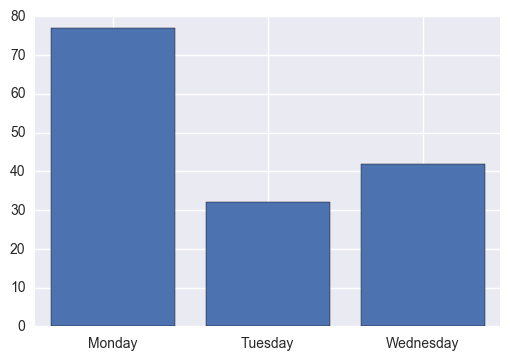

In [124]:
import pylab as plt

DayOfWeekOfCall = [1,2,3]
DispatchesOnThisWeekday = [77, 32, 42]

LABELS = ["Monday", "Tuesday", "Wednesday"]

plt.bar(DayOfWeekOfCall, DispatchesOnThisWeekday, align='center')
plt.xticks(DayOfWeekOfCall, LABELS)
plt.show()

TypeError: 'list' object is not callable

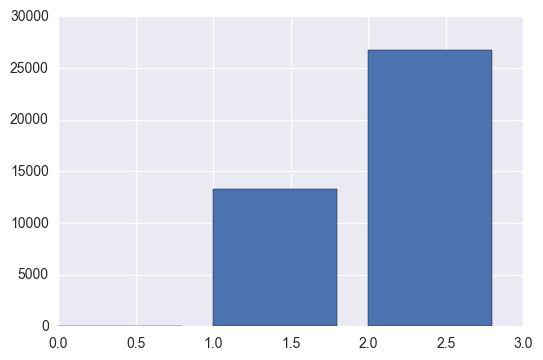

In [125]:
changes = [0,1,2]
values = np.array([0,int(value_of_DB_add5-value_of_DB),int(value_of_DB_add10-value_of_DB)])
plt.bar(changes,values)
plt.xticks=([0,1,2])
labels = ["0%","5%","10%"]
plt.xticks(changes, labels)
plt.show()

In [ ]:
values

In [126]:
np.array([0,int(value_of_DB_add5-value_of_DB),int(value_of_DB_add10-value_of_DB)])

array([    0, 13324, 26705])